Text clustering, also known as **text clustering or document clustering**, is the process of grouping a set of textual documents into clusters based on their content similarity. The goal is to **organize a large collection of documents** in such a way that documents within the same cluster are more similar to each other in content than to those in other clusters.

Here's an overview of the text clustering process:

Preprocessing: The textual data is preprocessed to remove noise, irrelevant information, and standardize the text. This typically involves steps such as tokenization, stop word removal, stemming or lemmatization, and normalization.

Feature Extraction: Textual data is transformed into a numerical representation suitable for clustering algorithms. Common methods include Bag-of-Words (BoW), Term Frequency-Inverse Document Frequency (TF-IDF), word embeddings (e.g., Word2Vec, GloVe), or topic modeling techniques such as Latent Semantic Analysis (LSA) or Latent Dirichlet Allocation (LDA).

Clustering Algorithm Selection: There are various clustering algorithms that can be used for text clustering, including K-means, hierarchical clustering, DBSCAN, spectral clustering, and more. The choice of algorithm depends on factors such as the size and nature of the dataset, the desired number of clusters, and the computational resources available.

Clustering: Once the feature representation is obtained and the clustering algorithm is selected, the documents are clustered into groups based on their feature similarity. The algorithm assigns each document to one or more clusters, with documents in the same cluster considered similar to each other.

Evaluation: The quality of the clustering results can be assessed using internal metrics (e.g., silhouette score) or external metrics (e.g., purity, F1 score) depending on whether ground truth labels are available.

Interpretation and Visualization: After clustering, it's important to interpret the clusters and understand the underlying themes or topics represented by each cluster. Visualization techniques such as t-SNE or PCA can be used to visualize high-dimensional text data in lower-dimensional space for easier interpretation.

Text clustering finds applications in various domains such as information retrieval, text summarization, document organization, recommendation systems, and topic modeling, among others. It enables efficient organization and retrieval of textual information, facilitating better decision-making and knowledge discovery from large text datasets.

In [ ]:
import pandas as pd

In [ ]:
data= pd.read_csv("JEOPARDY_CSV.csv")
data.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216930 entries, 0 to 216929
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Show Number  216930 non-null  int64 
 1    Air Date    216930 non-null  object
 2    Round       216930 non-null  object
 3    Category    216930 non-null  object
 4    Value       216930 non-null  object
 5    Question    216930 non-null  object
 6    Answer      216928 non-null  object
dtypes: int64(1), object(6)
memory usage: 11.6+ MB


In [ ]:
# for clustring task we need just information of " question " feature.
x= data[" Question"]
x.head()

0    For the last 8 years of his life, Galileo was ...
1    No. 2: 1912 Olympian; football star at Carlisl...
2    The city of Yuma in this state has a record av...
3    In 1963, live on "The Art Linkletter Show", th...
4    Signer of the Dec. of Indep., framer of the Co...
Name:  Question, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer= TfidfVectorizer()
vectorizer.fit(data[" Question"])

TfidfVectorizer()

In [ ]:
x= vectorizer.transform(data[" Question"])

In [ ]:
x

<216930x90512 sparse matrix of type '<class 'numpy.float64'>'
	with 2943396 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.cluster import KMeans


In [ ]:
kmeans=KMeans(n_clusters= 10 , max_iter= 300)
kmeans.fit(x)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10)

In [ ]:
kmeans.inertia_

#

209811.1565683932

In the context of the K-means algorithm, inertia refers to the sum of squared distances between each data point and its nearest cluster centroid. It is also known as within-cluster sum of squares (WCSS).

Mathematically, the inertia I of a clustering solution with k clusters is calculated as:

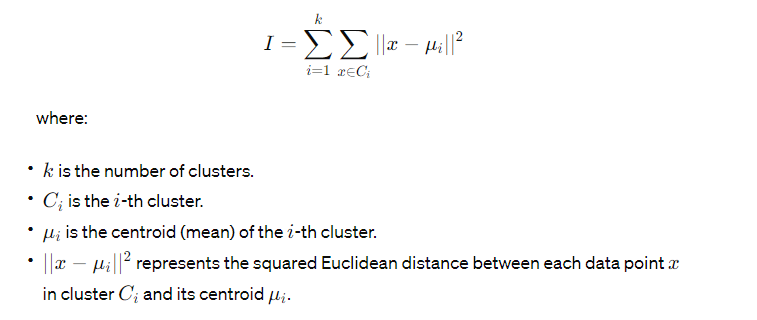

Inertia is a measure of how internally coherent the clusters are. **Lower inertia** **indicates that the data points within each cluster are closer to** **their centroid**, suggesting **tighter and more compact clusters**. Conversely, higher inertia implies that the clusters are more spread out, with data points farther away from their centroids.

In **K-means, the algorithm aims to minimize inertia** by iteratively adjusting cluster centroids until convergence. The final centroids represent the center of gravity for each cluster, minimizing the total within-cluster variation. Therefore, inertia is often used as an evaluation metric to assess the quality of a K-means clustering solution: lower inertia values indicate better clustering performance.

In [ ]:
from sklearn.metrics import silhouette_score

Silhouette analysis is a technique used to evaluate the quality of clusters formed by a clustering algorithm, such as K-means or hierarchical clustering. It provides a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette score ranges from -1 to 1, where:

A score close to +1 indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
A score close to 0 indicates that the object is on or very close to the decision boundary between two neighboring clusters.
A score close to -1 indicates that the object may have been assigned to the wrong cluster.

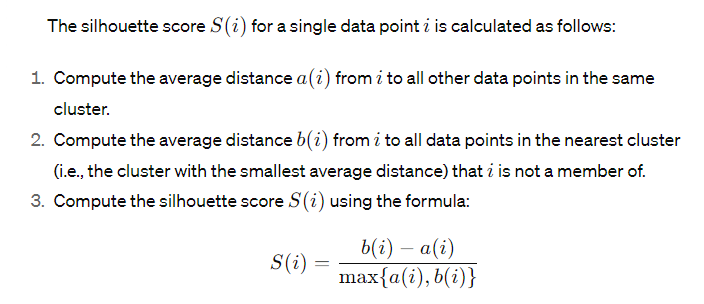

The silhouette score for the entire dataset is the average of the silhouette scores for each data point.

**Silhouette analysis helps in understanding** the **cohesion and separation** of **clusters**. A **high average silhouette score indicates** that the **clustering configuration is appropriate**, with **well-separated** and **compact clusters**. Conversely, a **low** average **silhouette** score **suggests** that the clusters may be **overlapping clusters** or poorly defined.

By using silhouette analysis, you can compare different clustering algorithms, evaluate the consistency of cluster assignments, and determine the optimal number of clusters for your dataset.

In [ ]:
silhouette_score(x , kmeans.labels_)

0.007074378593729938

 a silhouette score **close to zero**, such as the one we provided, suggests that data points are close to the **decision boundary** **between clusters**. This could mean that the **clusters are not well-separated**, or that some data points are misclassified.



**Improving silhouette scores** in text clustering can be achieved through various techniques, even if you only have dimensionality reduction techniques like UMAP available. Here are some approaches:

- Stop Words Removal:

Removing stop words, which are common words like "and," "the," "is," etc., can help improve the quality of text representations by reducing noise. This can lead to better-defined clusters and potentially higher silhouette scores. You can **remove stop words before or after dimensionality reduction** , depending on your preference and the specific characteristics of your data.


- TF-IDF Vectorization:

Term Frequency-Inverse Document Frequency (TF-IDF) vectorization is a technique that assigns weights to terms based on their frequency in a document relative to their frequency in the entire corpus. TF-IDF naturally downweights common words (including potential stop words) and upweights rare words, which can improve the discriminative power of features and potentially lead to better clustering results.


- Feature Selection:

Feature selection techniques can be used to choose the most informative features (words) for clustering while discarding less useful ones. Techniques like mutual information, chi-square test, or feature importance from machine learning models can help identify relevant features and improve clustering performance.


- Word Embeddings:

Utilizing word embeddings, such as Word2Vec, GloVe, or FastText, can capture semantic relationships between words and enhance the representation of text data. Word embeddings often encode contextual information and can mitigate the impact of stop words by focusing on the meaning of words rather than just their frequency.


- Clustering Algorithm Selection:

Experimenting with different clustering algorithms might yield better results for your specific text data. Some algorithms may be more robust to noise (including stop words) or may better handle the high-dimensional space produced by **UMAP** .


- Domain-Specific Knowledge:

Incorporating domain-specific knowledge about your text data can help identify irrelevant words or phrases that can be safely removed. This knowledge can guide the preprocessing steps and improve the quality of the text representations.



By incorporating these techniques, you can potentially enhance the quality of your text representations and improve the silhouette scores of your clustering results, even when limited to dimensionality reduction techniques like UMAP.

In the context of text clustering, where the data might be **high-dimensional** and sparse (e.g., using techniques like TF-IDF or word embeddings), **silhouette** scores **tend to be lower** compared to datasets with lower dimensionality and denser data. This is because text data often contains noise, ambiguity, and inherent similarities between documents that make it challenging to form distinct clusters.

**high dimensional = low silhouette score = not good separated clusters**

**make lower dimensionality ----> feature reduction ----> remove stop words**



in NLP each word is feature

**UMAP** (Uniform Manifold Approximation and Projection) is primarily known as a **dimensionality reduction technique** that is often used for **visualizing** high-dimensional data in lower-dimensional spaces while preserving the underlying structure of the data. However, UMAP can also be applied in text clustering tasks, particularly for feature extraction and visualization.

In [ ]:
# define x with label feature
xl= data[" Question"]

In [ ]:
# add label of cluser as feature  to xl
# so xl is dataframe with a feature= question , second feature = labled cluster
xl["clusters"] = kmeans.labels_

<ipython-input-15-0fe5b3cd74b9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xl["clusters"] = kmeans.labels_


In [ ]:
# Count the most common words in the clusters
from collections import Counter

# Filter xl DataFrame based on the "clusters" column
cluster_1_data = xl.loc[xl["clusters"] == 1, "Question"]

# Join the text data together and split it into words
joined_text = " ".join(cluster_1_data)
words_split = joined_text.split()

# Count the occurrence of each word and find the most common ones
words_common = Counter(words_split).most_common(120)


**Counter helps you count** the occurrence of **words** in a text, which is useful for identifying the **most common words and topics in a cluster**


This is helpful in text clustering because it allows you to identify the most frequent words in a cluster, which can give insights into the topics or themes present in that cluster


**most common words ==  cluster topic**